In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data\house_rental_data.csv', index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [4]:
df.shape

(645, 7)

In [5]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [6]:
df.rename(columns={'Living.Room':'LivingRoom'}, inplace= True)

In [7]:
import seaborn as sns

<AxesSubplot:>

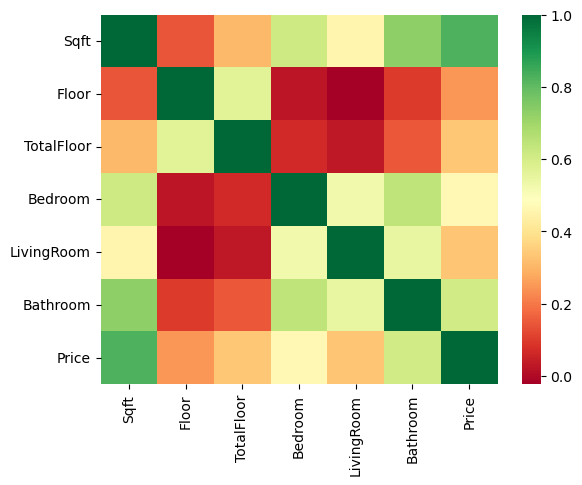

In [8]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [9]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'LivingRoom', 'Bathroom',
       'Price'],
      dtype='object')

In [10]:
X = df[['Sqft','Floor','TotalFloor','Bedroom','LivingRoom','Bathroom']]
y = df['Price']

In [11]:
print(X.shape)
print(y.shape)

(645, 6)
(645,)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

In [14]:
print(X_train.shape)
print(X_test.shape)

(483, 6)
(162, 6)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [33]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [17]:
lr.coef_

array([   40.5765933 ,  1163.03204928,   -85.24990218, -2908.68338848,
       -4660.85197877,  3584.2057213 ])

In [18]:
X_test[:5]

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom
38,768.528,4,4,3,2,2
417,1529.940,2,12,2,2,1
201,718.716,5,7,2,2,1
501,889.500,11,13,2,2,2
249,2668.500,5,12,4,2,2


In [19]:
y_test[:5]

38      60000
417     58000
201     43000
501     49998
249    138888
Name: Price, dtype: int64

In [20]:
predicted = lr.predict(X_test[:5])
predicted

array([ 29847.26460247,  57059.18401077,  28057.82334695,  45038.55486083,
       104514.0051697 ])

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
pred = lr.predict(X_test)

In [23]:
mean_absolute_error(y_pred=pred, y_true=y_test)

15812.380096201727

In [40]:
from sklearn.linear_model import Ridge,Lasso

In [41]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train,y_train)
rpred = ridge.predict(X_test)

In [42]:
mean_absolute_error(y_pred=rpred, y_true=y_test)

15774.797405483978

In [43]:
lasso = Lasso(alpha=1000)
lasso.fit(X_train,y_train)
lpred = lasso.predict(X_test)

In [44]:
mean_absolute_error(y_pred=lpred, y_true=y_test)

15717.74253660206